In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
df = pd.DataFrame({
    'Substância': ['Álcool', 'Gasolina', 'Leite', 'Querosene', 'Óleo', 'Vinho'],
    'Concentração': [12.5, 0.1, 4.0, 1.2, 0.5, 15.0],
    'Teor Alcoólico': [50, 0.05, 0.01, 0.02, 0.01, 12.5]
})

In [9]:
df = pd.get_dummies(df, columns=['Substância'])
df

,Concentração,Teor Alcoólico,Substância_Gasolina,Substância_Leite,Substância_Querosene,Substância_Vinho,Substância_Álcool,Substância_Óleo
0,12.5,50.00,False,False,False,False,True,False
1,0.1,0.05,True,False,False,False,False,False
2,4.0,0.01,False,True,False,False,False,False
3,1.2,0.02,False,False,True,False,False,False
4,0.5,0.01,False,False,False,False,False,True
5,15.0,12.50,False,False,False,True,False,False


In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

c:\Users\mta6ca\Documents\BoschFiles\Senai-University-Files\2023.2\Big Data e IA\FormsExercise\forms5\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [11]:
sse = kmeans.inertia_
sse
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'Dados de Substâncias')

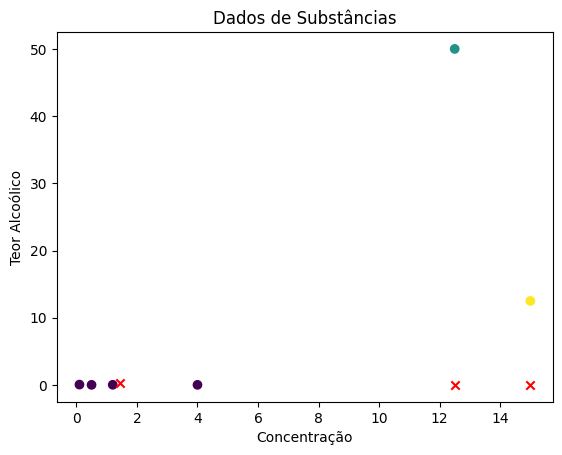

In [12]:
plt.scatter(df['Concentração'], df['Teor Alcoólico'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 2], marker='x', color='red')
plt.xlabel('Concentração')
plt.ylabel('Teor Alcoólico')
plt.title('Dados de Substâncias')

In [13]:
df['Group'] = labels
grouped_data = df.groupby('Group').mean()
grouped_data

,Concentração,Teor Alcoólico,Substância_Gasolina,Substância_Leite,Substância_Querosene,Substância_Vinho,Substância_Álcool,Substância_Óleo
Group,,,,,,,,
0,1.45,0.0225,0.25,0.25,0.25,0.0,0.0,0.25
1,12.50,50.0000,0.00,0.00,0.00,0.0,1.0,0.00
2,15.00,12.5000,0.00,0.00,0.00,1.0,0.0,0.00
